In [56]:
# Veri analizi ve görselleştirme için gerekli kütüphaneleri içe aktarıyoruz.

# Veri çerçeveleri ve veri manipülasyonu için pandas kütüphanesini içe aktarıyoruz.
import pandas as pd 
# Verileri görselleştirmek için matplotlib kütüphanesini içe aktarıyoruz.
import matplotlib.pyplot as plt 
# Seaborn kütüphanesini içe aktarıyoruz. Seaborn, daha çekici grafikler oluşturmak için kullanılır.
import seaborn as sns  
# Sayısal işlemler için numpy kütüphanesini içe aktarıyoruz.
import numpy as np  

# Jupyter Notebook veya Jupyter Lab gibi ortamlarda grafiklerin hücre 
#içinde görüntülenmesini sağlayan bir sihirli komut.
%matplotlib inline

# Seaborn'un çizim stilini "whitegrid" olarak ayarlıyoruz. 
#Bu, grafiklerde beyaz bir ızgara arkaplanın kullanılmasını sağlar.
sns.set_style("whitegrid")

# Matplotlib'in çizim stilini "fivethirtyeight" olarak ayarlıyoruz. 
#Bu, belirli bir grafik stiline sahip olmamızı sağlar.
plt.style.use("fivethirtyeight")


In [2]:
# Pandas kütüphanesini kullanarak "heart_master.csv" adlı 
#CSV dosyasını okuyoruz ve veriyi bir veri çerçevesine yüklüyoruz.
# Bu dosya, kalp hastalığı ile ilgili çeşitli özellikleri içeren bir veri setini içeriyor.
df = pd.read_csv("heart_master.csv")

# Veri çerçevesinin ilk 5 satırını görüntülüyoruz. 
# Bu, veriyi incelememize ve yapımızı anlamamıza yardımcı olur.
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Veri çerçevesindeki sayısal sütunların gösterimini 
#iki ondalık basamağa ayarlıyoruz.
pd.set_option("display.float", "{:.2f}".format)

# Veri çerçevesinin temel istatistik özetini alıyoruz.
# Bu, verinin istatistiksel özelliklerini incelememize 
# olanak tanır, örneğin ortalama, standart sapma, min-max değerleri gibi.
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


<Axes: >

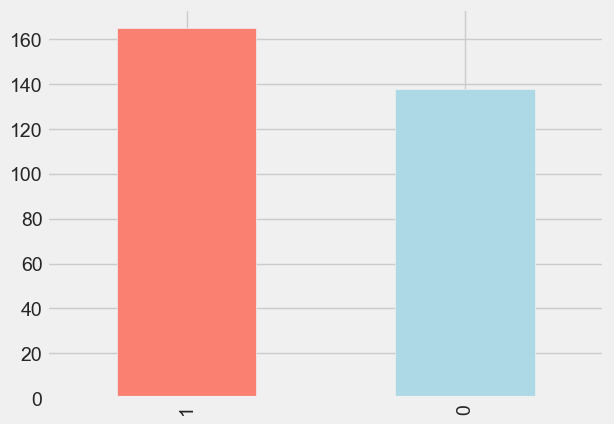

In [4]:
# Veri çerçevesindeki "target" sütununun sınıf dağılımını hesapla 
# ve çubuk grafikle göster.
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

# value_counts() ile "target" sütunundaki her bir sınıfın 
# kaç kez bulunduğunu sayarız.
# Ardından, bu sınıf sayılarını bar grafiği olarak çizeriz. 
# "salmon" ve "lightblue" renkler kullanılır.


In [5]:
# Veri çerçevesindeki her sütundaki eksik (NaN) değerlerin sayısını hesapla.
missing_values = df.isna().sum()

#Bu kodun çıktısı, her sütunda kaç eksik değer olduğunu gösterir. 
#Eksik değerler veri analizi ve işlemeye başlamadan önce ele alınması gereken önemli 
#bir veri kalitesi sorununu temsil edebilir. 
#Bu nedenle eksik değerlerin ne kadar yaygın olduğunu 
# ve nasıl ele alınması gerektiğini 
#anlamak için bu tür bir inceleme yapmak önemlidir.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# İki boş liste oluştur: biri kategorik değişkenleri, 
# diğeri sürekli değişkenleri saklamak için.
categorical_val = []
continuous_val = []

# Veri çerçevesindeki her sütunu incele.
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    
    # Sütundaki benzersiz değerlerin sayısını kontrol et.
    if len(df[column].unique()) <= 10:
        # Eğer benzersiz değerlerin sayısı 10 veya daha azsa, 
        # bu sütunu kategorik olarak kabul et.
        categorical_val.append(column)
    else:
        # Değilse, bu sütunu sürekli olarak kabul et.
        continuous_val.append(column)


age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

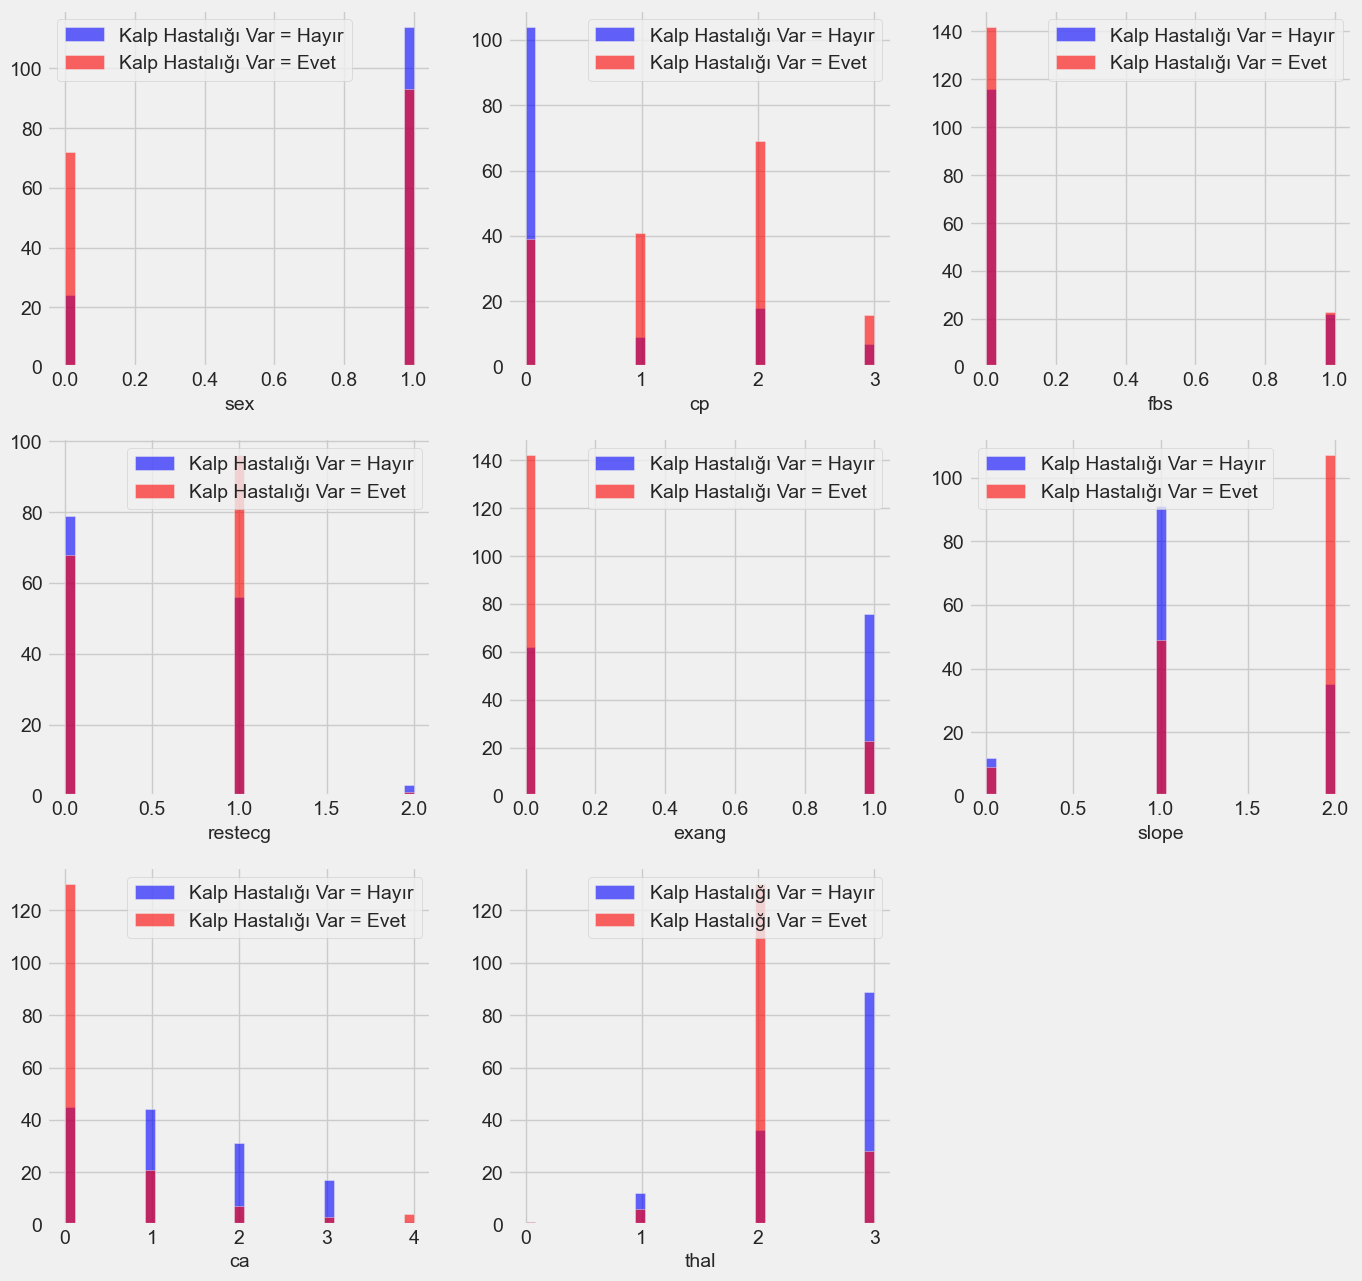

In [64]:
# Büyük bir figür oluşturun ve altında subplotlar oluşturun
plt.figure(figsize=(15, 15))

# Her bir kategorik değişkeni sırayla işlemek için döngü başlatın
for i, column in enumerate(categorical_val, 1):
    # 3x3 bir altçizim oluşturun ve şu anki subplota geçin
    plt.subplot(3, 3, i)
    
    # "target" sütunu 0 olan verilerin histogramını çizin (Mavi)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Kalp Hastalığı Var = Hayır', alpha=0.6)
    
    # "target" sütunu 1 olan verilerin histogramını çizin (Kırmızı)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Kalp Hastalığı Var = Evet', alpha=0.6)
    
    # Histogramların üzerine açıklama ekleyin ve x-eksenine etiket ekleyin
    plt.legend()
    plt.xlabel(column)

# Sonuç olarak büyük bir subplot matrisi içinde her bir kategorik 
# değişkenin histogramını görüntüleyeceksiniz.


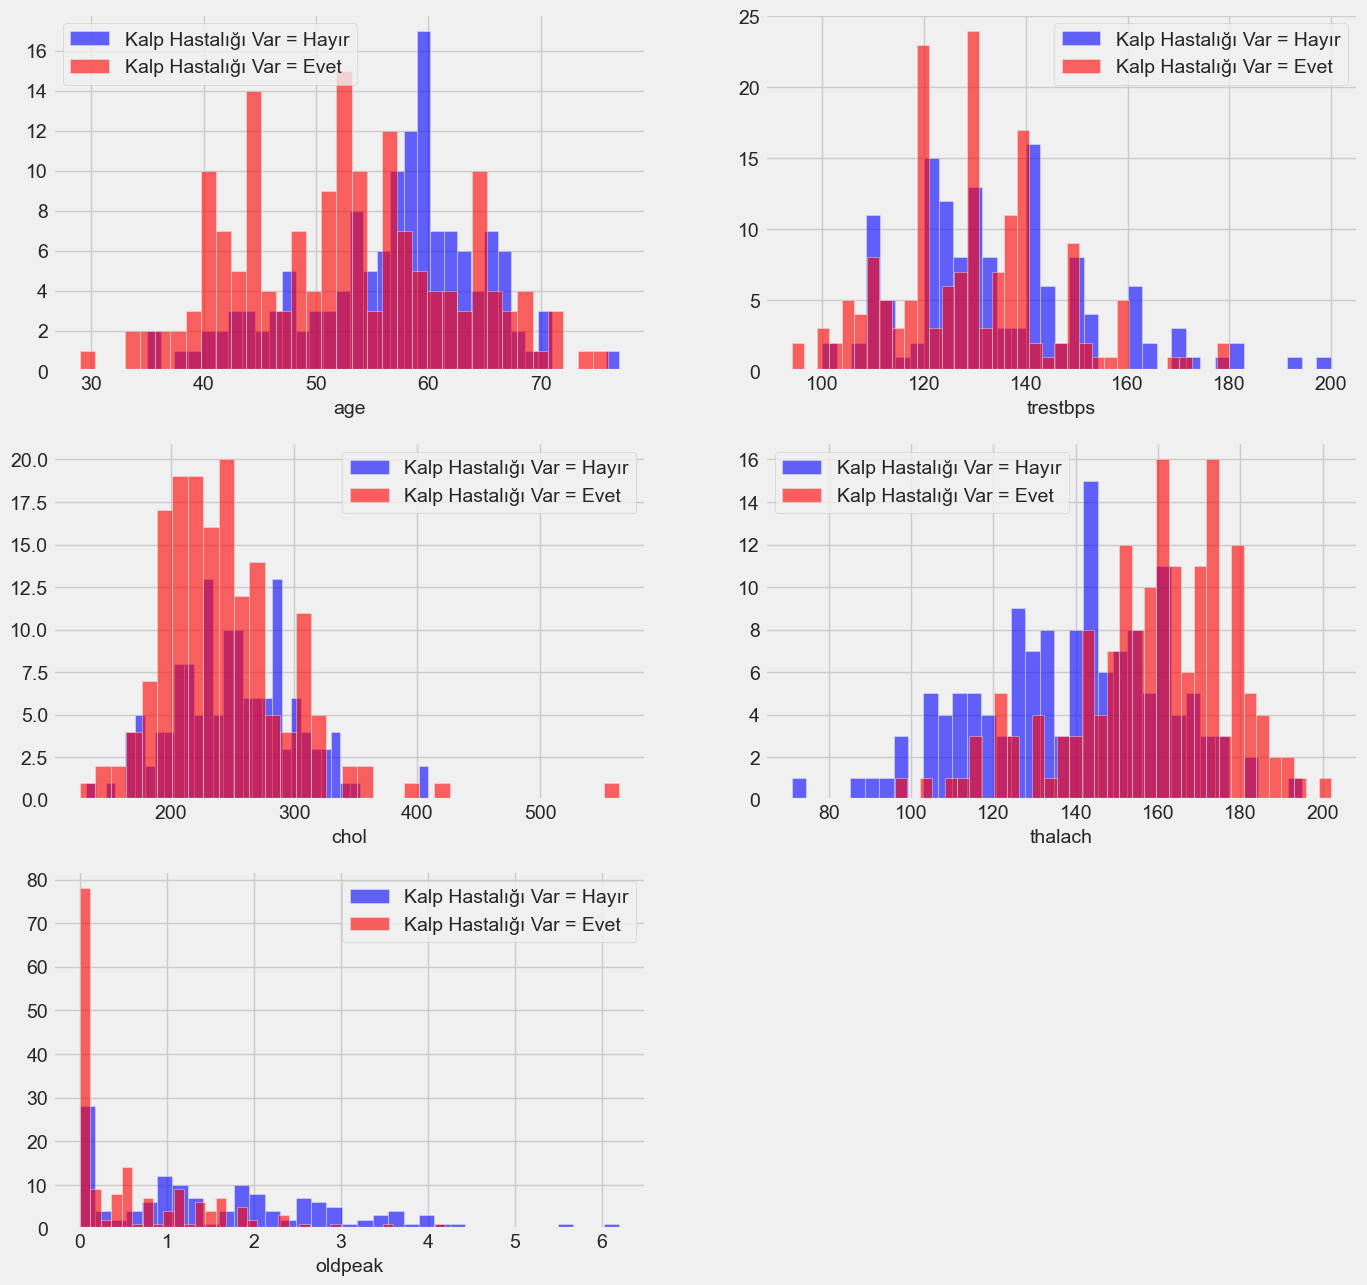

In [63]:
# Büyük bir figür oluşturun ve altında subplotlar oluşturun
plt.figure(figsize=(15, 15))

# Her bir sürekli değişkeni sırayla işlemek için döngü başlatın
for i, column in enumerate(continous_val, 1):
    # 3x2 bir altçizim oluşturun ve şu anki subplota geçin
    plt.subplot(3, 2, i)
    
    # "target" sütunu 0 olan verilerin histogramını çizin (Mavi)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Kalp Hastalığı Var = Hayır', alpha=0.6)
    
    # "target" sütunu 1 olan verilerin histogramını çizin (Kırmızı)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Kalp Hastalığı Var = Evet', alpha=0.6)
    
    # Histogramların üzerine açıklama ekleyin ve x-eksenine etiket ekleyin
    plt.legend()
    plt.xlabel(column)

# Sonuç olarak büyük bir subplot matrisi içinde 
# her bir sürekli değişkenin histogramını görüntüleyeceksiniz.


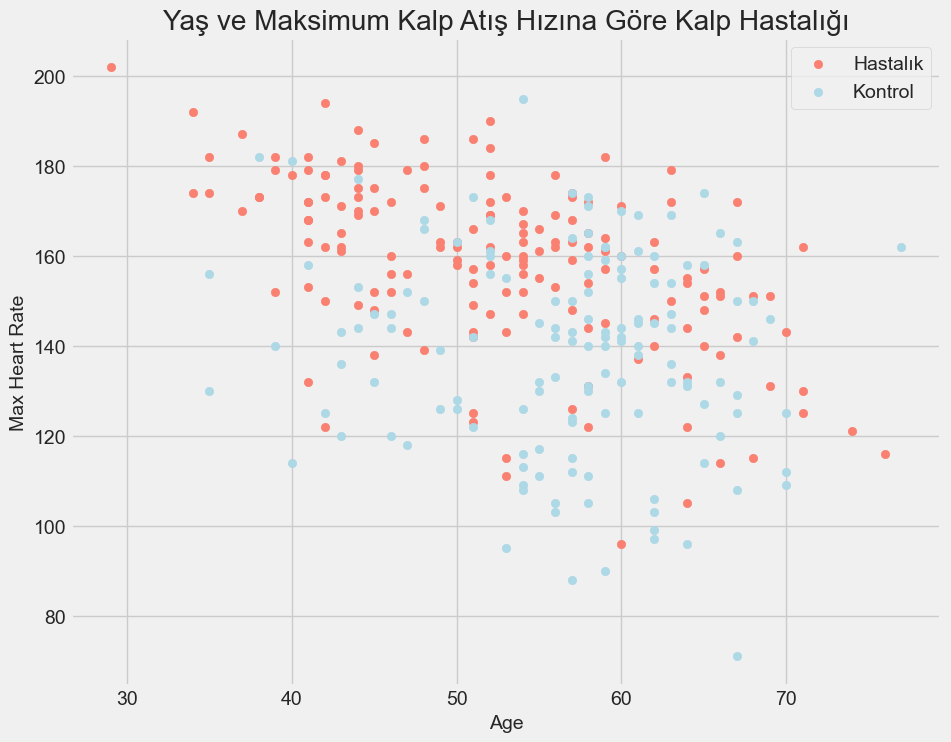

In [62]:
# Bu kod, yaş (age) ve maksimum kalp hızı (max heart rate) arasındaki ilişkiyi 
# görselleştiren bir saçılma (scatter) grafiği oluşturur. 

# Yeni bir figür (figure) oluşturun
plt.figure(figsize=(10, 8))

# Kalp hastalığı olan kişileri temsil eden noktaları 
# (scatter plot) çizin ve "salmon" renk kullanın
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Kalp hastalığı olmayan kişileri temsil eden noktaları 
# (scatter plot) çizin ve "lightblue" renk kullanın
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Grafiğe başlık ekleyin
plt.title("Yaş ve Maksimum Kalp Atış Hızına Göre Kalp Hastalığı")

# X eksenine etiket ekleyin
plt.xlabel("Age")

# Y eksenine etiket ekleyin
plt.ylabel("Max Heart Rate")

# Grafiğe bir açıklama (legend) ekleyin
plt.legend(["Hasta Grubu", "Kontrol Grubu"]);


(14.5, -0.5)

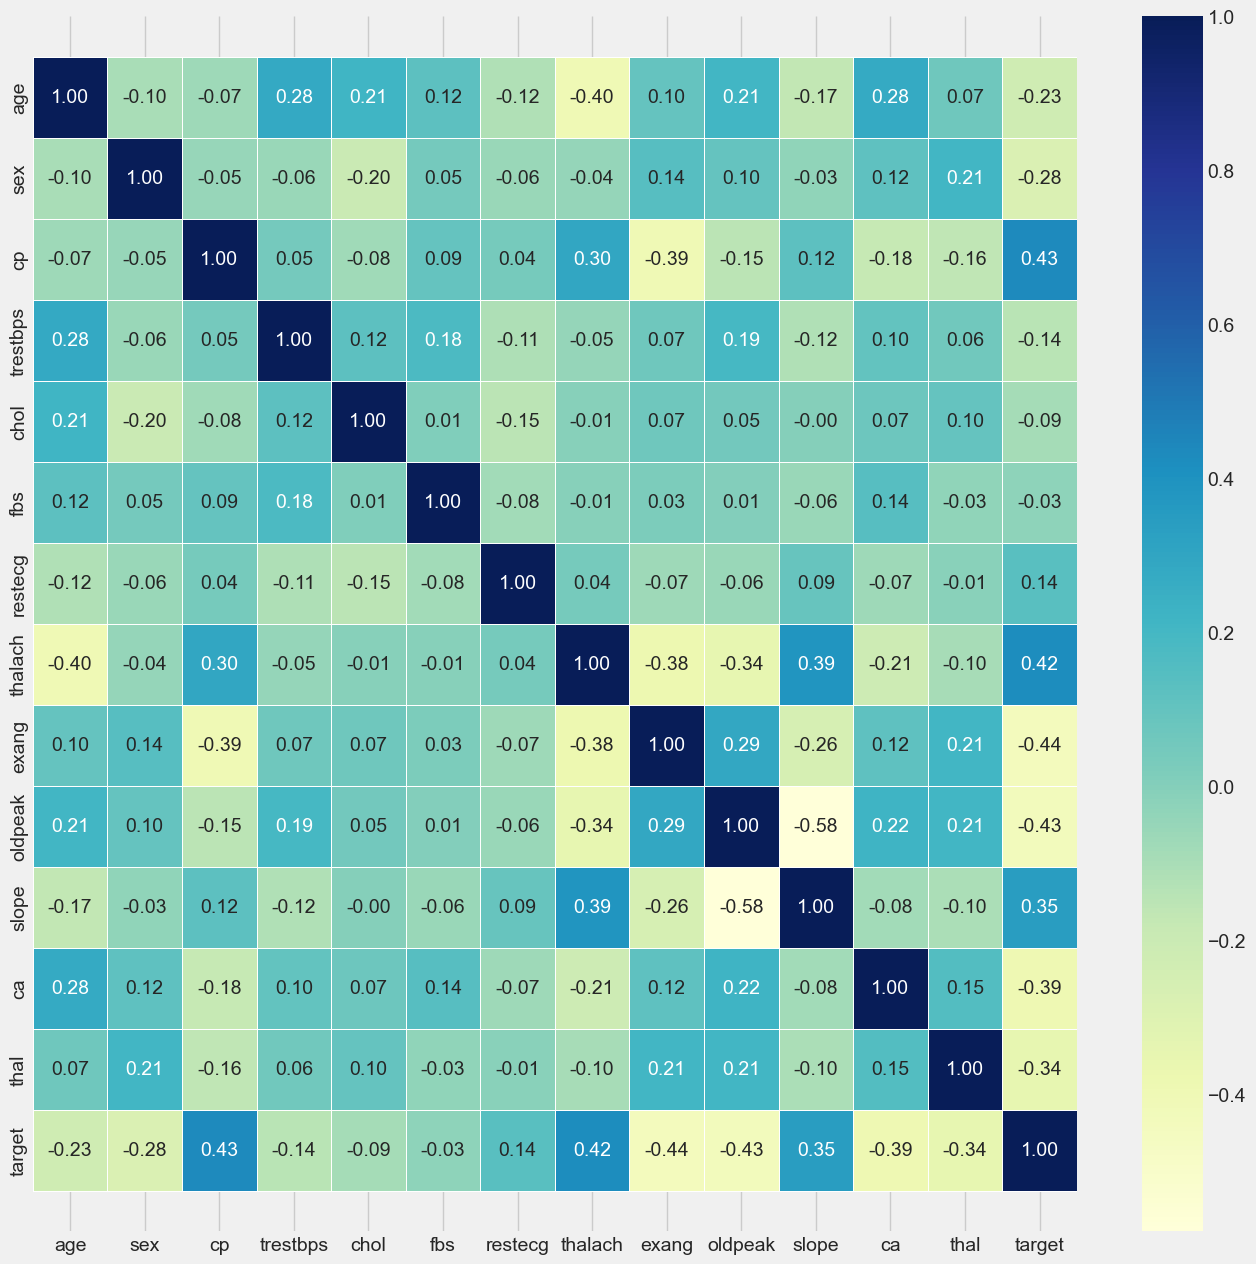

In [61]:
# Bu kod, bir korelasyon matrisini daha güzel 
# ve bilgilendirici bir şekilde görselleştiren 
# bir ısı haritası (heatmap) oluşturur. 
# Korelasyon matrisi, verilerin birbirleriyle nasıl ilişkili olduğunu gösterir. 

# Korelasyon matrisini oluşturun
corr_matrix = df.corr()

# Bir figür (figure) ve eksen (axis) oluşturun, figsize ile boyutunu belirleyin
fig, ax = plt.subplots(figsize=(15, 15))

# Korelasyon matrisini ısı haritası olarak çizin
ax = sns.heatmap(corr_matrix,
                 annot=True,        # Karelerin içine değerlerin yazılmasını etkinleştirin
                 linewidths=0.5,    # Kareler arasındaki çizgi kalınlığı
                 fmt=".2f",         # Değerlerin ondalık basamak sayısı
                 cmap="YlGnBu")     # Renk haritası (cmap) belirleyin

# Eksenlerin alt ve üst sınırlarını ayarlayarak tam görüntüyü alın
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


In [48]:
df = pd.read_csv("heart_master.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


<Axes: title={'center': 'Correlation with target'}>

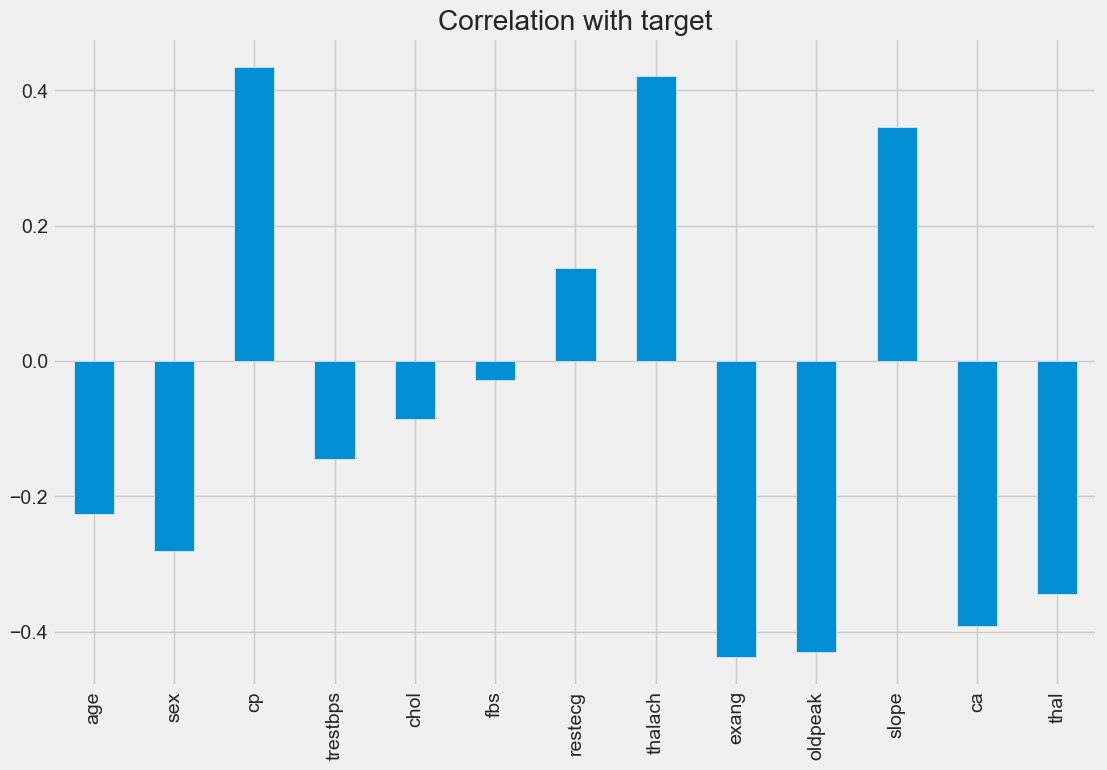

In [66]:
# "target" sütununu veri çerçevesinden kaldırın ve geriye kalan sütunlarla "target" sütunu arasındaki korelasyonu hesaplayın
correlation = df.drop('target', axis=1).corrwith(df.target)

# Korelasyonları çubuk grafik olarak görselleştirin
correlation.plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target")


In [67]:
# "target" sütununu kategorik sütunlar listesinden çıkarın (eğer varsa)
# Not: 'target' genellikle hedef değişken olduğu için veri dönüşümünde kullanılmaz
#categorical_val.remove('target')

# Kategorik sütunları "One-Hot Encoding" ile dönüştürün, 
# bu şekilde makine öğrenme algoritmaları için uygun hale getirilirler.
dataset = pd.get_dummies(df, columns=categorical_val)

# Sayısal sütunlardaki değerleri standartlaştırın, 
# böylece farklı ölçeklerdeki verilerle başa çıkabilirsiniz.
# 'age', 'trestbps', 'chol', 'thalach', 'oldpeak' sütunları standartlaştırılır.

from sklearn.preprocessing import StandardScaler
s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])


In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Fonksiyon:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    """
    Bu fonksiyon, bir sınıflandırma modelinin performansını ekrana yazdırır.
    
    Argümanlar:
    - clf: Eğitilmiş sınıflandırma modeli.
    - X_train: Eğitim verisi özellikleri.
    - y_train: Eğitim verisi hedef değişkeni.
    - X_test: Test verisi özellikleri.
    - y_test: Test verisi hedef değişkeni.
    - train: Eğer True ise, eğitim verisi performansını yazdırır; 
    False ise test verisi performansını yazdırır.
    """
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [53]:
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test setlerine bölmek için kullanılan bir işlevdir.
# Bu işlev, veri setini bağımsız değişkenler (X) ve hedef değişken (y) olarak böler.
# Bölme işlemi rastgele yapılır, bu nedenle sonuçların 
# yeniden üretilebilir olması için random_state belirtilmiştir.

# X, bağımsız değişkenleri içerir (hedef değişken hariç).
X = dataset.drop('target', axis=1)

# y, hedef değişkeni içerir.
y = dataset.target

# Veriyi eğitim ve test setlerine bölmek için kullanılır. 
# test_size parametresi, verinin ne kadarının test seti olarak ayrılacağını belirler.
# random_state parametresi, bölmeyi tekrarladığınızda aynı sonuçları almanızı sağlar.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [68]:
from sklearn.linear_model import LogisticRegression

# Scikit-learn kütüphanesinden LogisticRegression sınıfını içe aktarıyoruz. 
# Bu sınıf, lojistik regresyon modelini temsil eder.

# Bir LogisticRegression nesnesi oluşturuyoruz ve 'solver' parametresini 
# 'liblinear' olarak ayarlıyoruz.
# 'liblinear', küçük veri setleri için uygun bir çözücüdür 
# ve ikili sınıflandırma problemleri için kullanılabilir.

lr_clf = LogisticRegression(solver='liblinear')

# Oluşturduğumuz lojistik regresyon modelini eğitiyoruz.
lr_clf.fit(X_train, y_train)

# Eğitim sonuçlarını ve test sonuçlarını yazdırmak için 
# print_score işlevini çağırıyoruz.
# İlk çağırış, eğitim sonuçlarını gösterir (train=True), 
# ikincisi ise test sonuçlarını gösterir (train=False).
# Bu işlev, sınıflandırma sonuçlarını ve doğruluk puanını yazdırır.

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 87.26%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.89   0.86      0.87       0.87          0.87
recall     0.82   0.91      0.87       0.87          0.87
f1-score   0.86   0.89      0.87       0.87          0.87
support   97.00 115.00      0.87     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 10 105]]

Test Result:
Accuracy Score: 81.32%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.80  0.82      0.81       0.81          0.81
recall     0.78  0.84      0.81       0.81          0.81
f1-score   0.79  0.83      0.81       0.81          0.81
support   41.00 50.00      0.81      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[32  9]
 [ 8 42]]



Eğitim Sonuçları:

Eğitim verileri üzerindeki doğruluk (Accuracy Score): %87.26
Sınıflandırma Raporu (Classification Report):
Sınıf 0 için hassasiyet (precision): %89
Sınıf 1 için hassasiyet (precision): %86
Sınıf 0 için duyarlılık (recall): %82
Sınıf 1 için duyarlılık (recall): %91
F1 skoru (f1-score): Sınıf 0 için %86, Sınıf 1 için %89
Destek (support): Sınıf 0 için 97 örnek, Sınıf 1 için 115 örnek
Karışıklık Matrisi (Confusion Matrix):
Sınıf 0'ı doğru tahmin etme (True Negatives): 80
Sınıf 0'ı yanlış tahmin etme (False Positives): 17
Sınıf 1'i yanlış tahmin etme (False Negatives): 10
Sınıf 1'i doğru tahmin etme (True Positives): 105

Test Sonuçları:

Test verileri üzerindeki doğruluk (Accuracy Score): %81.32
Sınıflandırma Raporu (Classification Report):
Sınıf 0 için hassasiyet (precision): %80
Sınıf 1 için hassasiyet (precision): %82
Sınıf 0 için duyarlılık (recall): %78
Sınıf 1 için duyarlılık (recall): %84
F1 skoru (f1-score): Sınıf 0 için %79, Sınıf 1 için %83
Destek (support): Sınıf 0 için 41 örnek, Sınıf 1 için 50 örnek
Karışıklık Matrisi (Confusion Matrix):
Sınıf 0'ı doğru tahmin etme (True Negatives): 32
Sınıf 0'ı yanlış tahmin etme (False Positives): 9
Sınıf 1'i yanlış tahmin etme (False Negatives): 8
Sınıf 1'i doğru tahmin etme (True Positives): 42

Sonuçlara göre, model eğitim verileri üzerinde %87.26 doğrulukla 
iyi performans gösteriyor gibi görünüyor. Ancak test verileri üzerinde 
doğruluk biraz düşüyor (%81.32), bu da modelin eğitim verilerine 
biraz aşırı uyum (overfitting) yapmış olabileceğini gösteriyor. 
Ayrıca, sınıf 1'i (kalp hastalığı olanları) 
tahmin etme konusunda biraz daha iyi performans gösteriyor. 

In [69]:
# Test verileri üzerindeki doğruluk skorunu hesaplayın ve yüzde olarak ifade edin
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100

# Eğitim verileri üzerindeki doğruluk skorunu hesaplayın ve yüzde olarak ifade edin
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

# Sonuçları saklamak için bir veri çerçevesi oluşturun
results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Oluşturulan veri çerçevesini ekrana yazdırın
results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.26,81.32


Eğitim verileri üzerindeki doğruluk yüzdesi (Training Accuracy %) 
yaklaşık olarak %87.26'dır. Bu, modelin eğitim verileri üzerindeki 
doğru tahminlerin yüzde 87.26 olduğunu gösterir. 
Model, eğitim verilerine oldukça iyi uyum sağlamış gibi görünüyor.

Test verileri üzerindeki doğruluk yüzdesi (Testing Accuracy %) 
ise yaklaşık olarak %81.32'dir. Bu, modelin daha önce görmediği 
yeni verilere uygulandığında doğru tahminlerin yüzde 81.32 olduğunu gösterir. 